# Práctica de Aprendizaje Automático

En esta práctica vamos a estudiar unos datos utilizando métodos de aprendizaje automático.

Esta práctica esta desarrollada por Belén Gómez Arnaldo con NIA 100472037 y Luis Gómez-Manzanilla Nieto con NIA 100472006.

---

## Lectura de datos 

Vamos a empezar leyendo el archivo de entrada *wind_ava.csv* e inctroduciendolo en un objeto de pandas

In [5]:
import pandas as pd
wind_ava = pd.read_csv('wind_ava.csv.gz', compression="gzip")

A continuación separaremos los conjuntos siendo *X* las entradas de *wind_ava* para la localización de Sotavento (13) y siendo *y* la energía eolíca que producirá el parque de Sotavento. 

In [6]:
from sklearn.model_selection import train_test_split

#Solo nos interesan las variables que terminan en .13
x = wind_ava.filter(regex='\.13$')
y = wind_ava['energy']

<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:4: SyntaxWarning: invalid escape sequence '\.'
C:\Users\ferna\AppData\Local\Temp\ipykernel_8636\3719106693.py:4: SyntaxWarning: invalid escape sequence '\.'
  x = wind_ava.filter(regex='\.13$')


---

## EDA

El primer paso de la práctica es realizar un EDA simplificado para conocer las características del conjunto de datos que estamos estudiando.

Para hacer una primera aproximación de los datos podemos utilizar la función *head()* que devueve las primeras 5 entradas.

In [7]:
x.head()

p54.162.13  p55.162.13    cape.13    p59.162.13  lai_lv.13  lai_hv.13  \
0  2.510824e+06    9.186295  13.527577  1.386937e+06   2.344111   2.432983   
1  2.513173e+06    8.849569   6.896412  1.153526e+06   2.343719   2.432838   
2  2.509627e+06    7.924080   4.774439  1.098754e+06   2.343300   2.432704   
3  2.510571e+06    6.922709   0.000000  1.076021e+06   2.342830   2.432514   
4  2.505664e+06    6.646282   0.000000  1.070830e+06   2.342437   2.432369   

    u10n.13   v10n.13         sp.13     stl1.13  ...      t2m.13     stl2.13  \
0 -0.757587 -1.922799  99846.319914  280.960661  ...  280.473098  281.042026   
1 -1.412620 -1.403011  99917.733093  279.296651  ...  278.286616  280.747406   
2 -2.290185 -0.754580  99764.378681  278.233956  ...  277.206490  280.114863   
3 -3.497855  1.271028  99672.670459  280.787263  ...  280.926600  279.991138   
4 -0.971249  0.553060  99372.811211  279.583112  ...  277.363875  280.576898   

      stl3.13   iews.13   inss.13     stl4.13    fsr.13   flsr.13   u100.13  \
0  281.462478 -0.057958 -0.138650  284.684755  0.404731 -5.927092 -1.780562   
1  281.486541 -0.103576 -0.083050  284.667948  0.404920 -5.913881 -3.743344   
2  281.487095 -0.165721 -0.036241  284.651914  0.405704 -5.908272 -5.097203   
3  281.472435 -0.275550  0.098192  284.636266  0.403967 -5.961995 -4.500835   
4  281.473265 -0.056553  0.041844  284.620232  0.403808 -5.987860 -3.392324   

    v100.13  
0 -4.443617  
1 -3.129469  
2 -1.157748  
3  1.502478  
4  2.131114  

[5 rows x 22 columns]

A primera vista los datos de todas las columnas parecen ser numéricos, pero vamos a anlizarlos más en profundidad.

### Dimension 

In [16]:
print('Dimensión de los datos')
print('===============================')
print(x.shape)


Dimensión de los datos
(4748, 22)


El conjunto de datos tiene 22 características y 4748 instancias.

### Análisis de variables

In [17]:
print('Los datos son de los siguientes tipos')
print('===============================')
x.info()

Los datos son de los siguientes tipos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4748 entries, 0 to 4747
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   p54.162.13  4748 non-null   float64
 1   p55.162.13  4748 non-null   float64
 2   cape.13     4748 non-null   float64
 3   p59.162.13  4748 non-null   float64
 4   lai_lv.13   4748 non-null   float64
 5   lai_hv.13   4748 non-null   float64
 6   u10n.13     4748 non-null   float64
 7   v10n.13     4748 non-null   float64
 8   sp.13       4748 non-null   float64
 9   stl1.13     4748 non-null   float64
 10  u10.13      4748 non-null   float64
 11  v10.13      4748 non-null   float64
 12  t2m.13      4748 non-null   float64
 13  stl2.13     4748 non-null   float64
 14  stl3.13     4748 non-null   float64
 15  iews.13     4748 non-null   float64
 16  inss.13     4748 non-null   float64
 17  stl4.13     4748 non-null   float64
 18  fsr.13      4748 non-null   fl

Como se puede ver, todos los datos de las columnas son del tipo float64, es decir, no hay variables categóricas. A continuación comprobaremos si hay valores faltantes y, si es así, qué varibles los tienen. 

In [18]:
print('Valores faltantes')
print('======================================')
print(x.isnull().sum())

Valores faltantes
p54.162.13    0
p55.162.13    0
cape.13       0
p59.162.13    0
lai_lv.13     0
lai_hv.13     0
u10n.13       0
v10n.13       0
sp.13         0
stl1.13       0
u10.13        0
v10.13        0
t2m.13        0
stl2.13       0
stl3.13       0
iews.13       0
inss.13       0
stl4.13       0
fsr.13        0
flsr.13       0
u100.13       0
v100.13       0
dtype: int64


Se puede observar que no hay ningún valor faltante en ninguna variable.

A continuación comporbaremos si hay variables con valores constantes

In [21]:
columnas_constantes = []
for columna in x.columns:
    if x[columna].nunique() == 1:
        columnas_constantes.append(columna)

if columnas_constantes:
    print("Las siguientes columnas tienen valores constantes:")
    for columna in columnas_constantes:
        print(f"- {columna}")
else:
    print("No hay columnas con valores constantes.")

No hay columnas con valores constantes.


Aunque no haya variables constantes, puede haber variables con valores muy parecidos. Para comprobar esto vamos a calcular la varianza de las variables y lo mostraremos en un gráfico.

Varianza de las variables
p54.162.13    2.009369e+09
p55.162.13    4.293153e+01
cape.13       1.482525e+04
p59.162.13    2.151950e+12
lai_lv.13     1.579087e-01
lai_hv.13     1.355691e-02
u10n.13       9.613612e+00
v10n.13       9.100875e+00
sp.13         5.093529e+05
stl1.13       4.114356e+01
u10.13        9.973619e+00
v10.13        9.355127e+00
t2m.13        3.798852e+01
stl2.13       3.077972e+01
stl3.13       2.100230e+01
iews.13       1.346989e-01
inss.13       1.436517e-01
stl4.13       1.262291e+01
fsr.13        5.779241e-05
flsr.13       8.903704e-03
u100.13       2.344235e+01
v100.13       2.178604e+01
dtype: float64


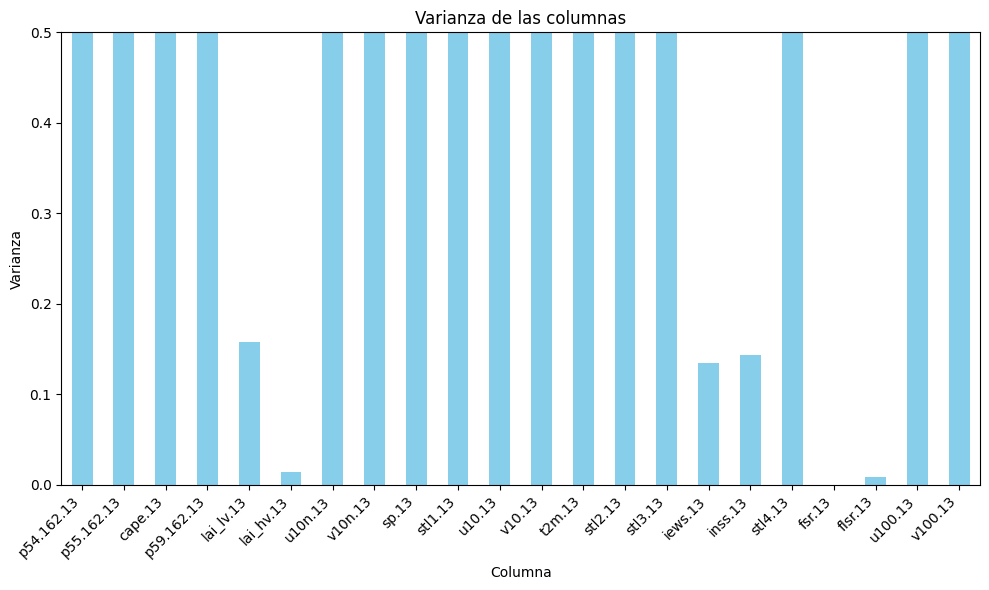

In [25]:
print('Varianza de las variables')
print(x.var())

import matplotlib.pyplot as plt

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
x.var().plot(kind='bar', color='skyblue')
plt.title('Varianza de las columnas')
plt.xlabel('Columna')
plt.ylabel('Varianza')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.ylim(0, 0.5)
plt.show()

Como se puede ver con estos resultados, hay algunas variables que tienen una varianza muy pequeña. Esto podría sugerir que los datos de estas variables son muy parecidos y no estarían influyendo mucho en el modelo

A continuación vamos a estudiar la correlación entre las variables.

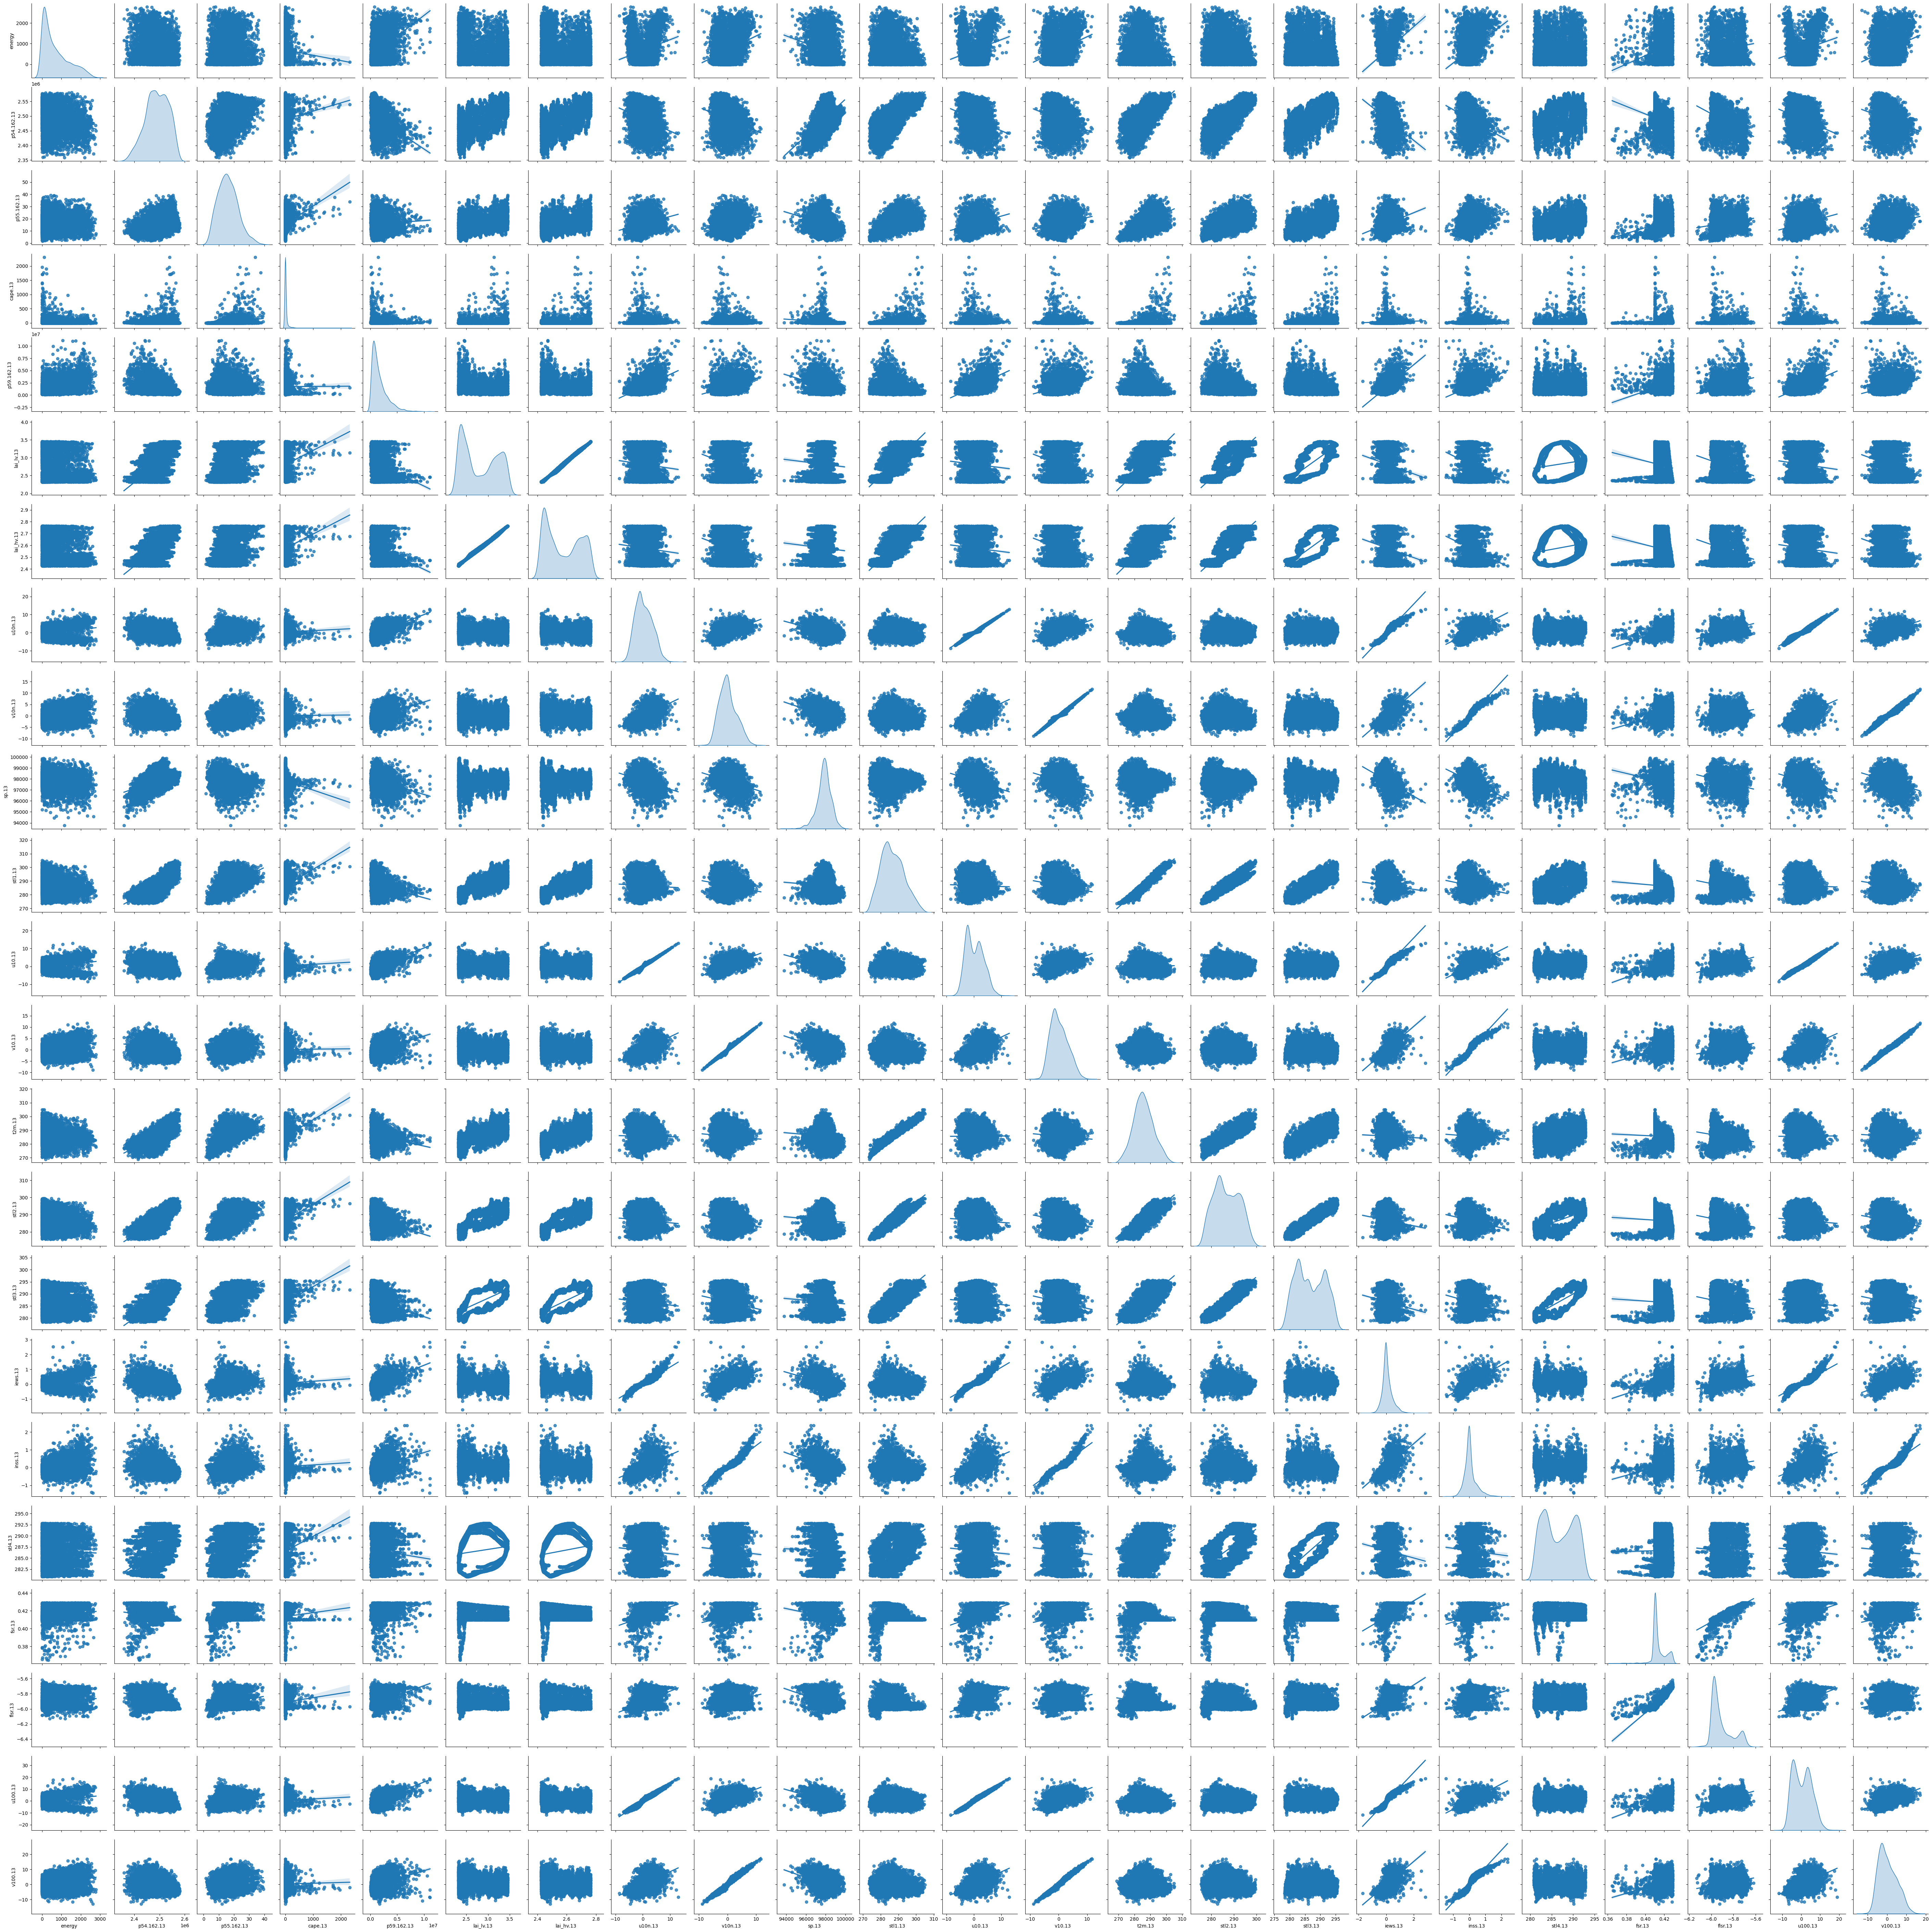

In [26]:
import seaborn as sns
x_copia = x.copy()
x_copia.insert(0, "energy", y)
_ = sns.pairplot(x_copia, kind="reg", diag_kind="kde")

Al haber tantas variables es difícil identificar cuales son las correladas, por lo que hemos hecho un mapa de calor de la matriz de correlación.

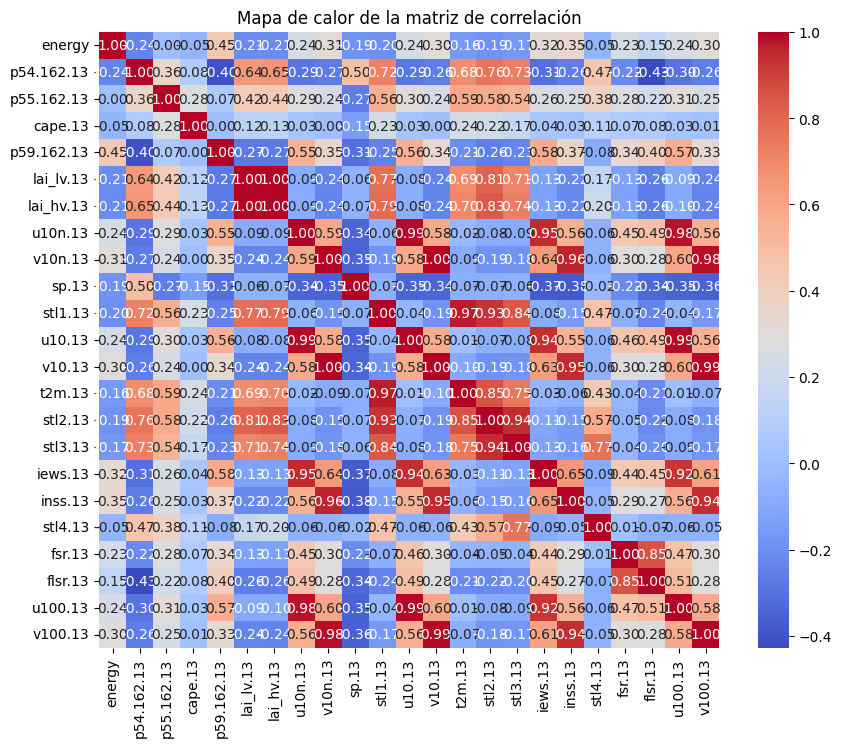

In [29]:
# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(x_copia.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de la matriz de correlación')
plt.show()

Las casillas de color rojo oscuro corresponden a las varibles con más correlación. En un futuro se podrían evaluar las varibles para determinar si alguna se podría eliminar.

### Análisis de la variable de salida

Para determinar si es un problema de regresión o de clasificación, estudiaremos la variables de salida *energy*

In [20]:
print('La variable de salida es de tipo:')
print('===============================')
y.info()

La variable de salida es de tipo:
<class 'pandas.core.series.Series'>
RangeIndex: 4748 entries, 0 to 4747
Series name: energy
Non-Null Count  Dtype  
--------------  -----  
4748 non-null   float64
dtypes: float64(1)
memory usage: 37.2 KB


La variable de salida es de tipo float64, es decir, es una variable continua, por lo que es un problema de regresión.

## Evalucaión

Para la creación del modelo dividiremos los conjuntos que tenemos en conjuntos de entrenamiento y conjuntos de prueba.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.33, random_state=100472037)